In [6]:
# !pip install trelawney
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)
# %cd '/content/gdrive/My Drive/LDS6_MachineLearning/practice/Chapter7_Random_Forest

# Chapter 7 - Exercise 1: Titanic

# Cho dữ liệu titanic trong tập tin titanic_csv.csv

## Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Random Forest để thực hiện việc xác định người trên tàu Titanic còn sống hay không dựa trên các thông tin được cung cấp.

## Chi tiết:
1. Đọc dữ liệu. Chuẩn hóa dữ liệu. Từ dữ liệu tạo X gồm các thuộc tính 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', y là 'survived'
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
3. Áp dụng Random Forest, Tìm kết quả
4. Kiểm tra độ chính xác
5. Tìm các thuộc tính quan trọng nhất trong tập dữ liệu
6. Trực quan hóa thuộc tính quan trọng
7. Áp dụng lại Random Forest dựa trên các thuộc tính quan trọng, tìm kết quả
8. Kiểm tra độ chính xác
9. Tự cho 1 dữ liệu X_test mới. Ví dụ như: X_test =[[tuoi = 35, gia ve =50, gioi tinh = Male, tanglop = 3], [tuoi = 18, gia ve = 250, gioi tinh = Female, tang lop = 2] ] , tìm kết quả Y test.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [13]:
titanic = pd.read_csv('Data/titanic_csv.csv', index_col = 0)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1308,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


## <span style='color:yellow'> Build RandomForestClassifier

Accuracy on train set: 0.826027397260274
Accuracy on test  set: 0.7699680511182109


Confusion matrix:
           Dead  Survived
Dead       139        38
Survived    34       102


Classification report:
               precision    recall  f1-score   support

        Dead       0.80      0.79      0.79       177
    Survived       0.73      0.75      0.74       136

    accuracy                           0.77       313
   macro avg       0.77      0.77      0.77       313
weighted avg       0.77      0.77      0.77       313



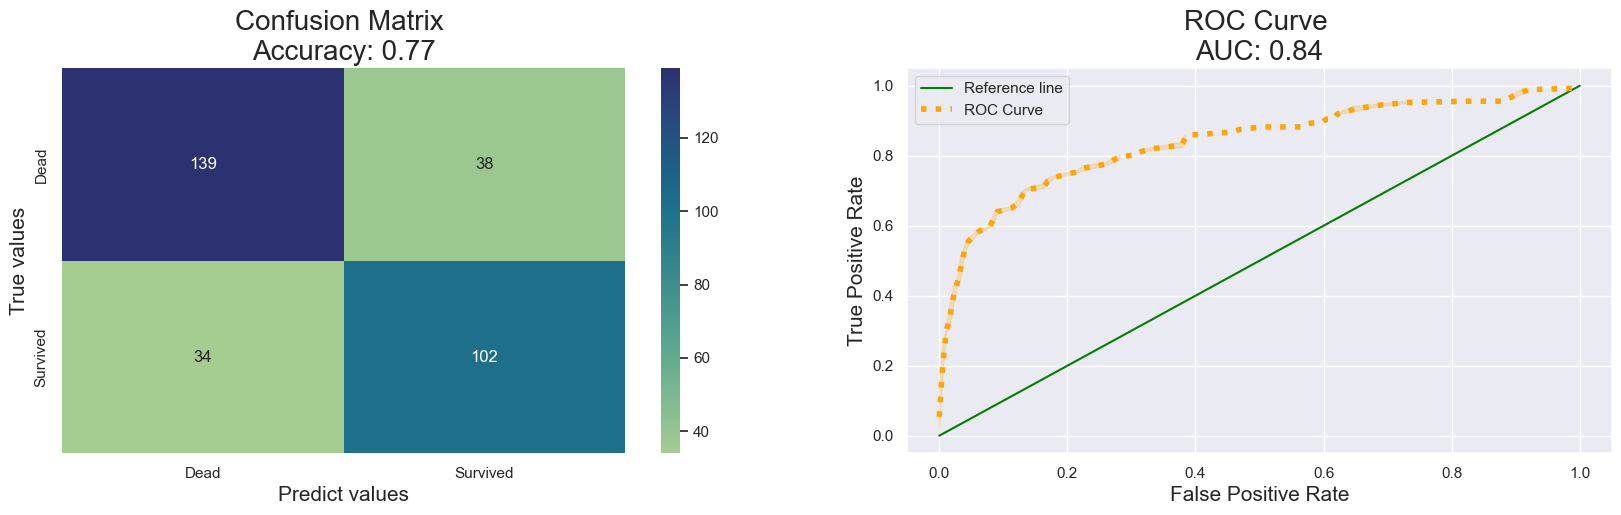

In [154]:
x = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
y = titanic['survived'].iloc[x.index - 1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#########################

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

forestC_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer((OneHotEncoder(handle_unknown='ignore', drop='first'), x.select_dtypes('object').columns), remainder='passthrough')),
    ('SMOTE_oversample', SMOTE(random_state=1)),
    ('Forest_Classifier', RandomForestClassifier(min_samples_split = 80, random_state=1) )
])

forestC_pipe.fit(x_train, y_train)

y_test_pred = forestC_pipe.predict(x_test)
y_test_proba = forestC_pipe.predict_proba(x_test)

print(f'Accuracy on train set: {forestC_pipe.score(x_train, y_train)}')
print(f'Accuracy on test  set: {forestC_pipe.score(x_test, y_test)}')
print()

labels = ['Dead', 'Survived']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {forestC_pipe.score(x_test, y_test):.2f}', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title(f'ROC Curve \nAUC: {auc(fpr, tpr):.2f}', size=20)
plt.show()

## <span style='color:yellow'> Select best features

      Feature    Scores
0    sex_male  0.524726
7        fare  0.130194
3      pclass  0.108638
4         age  0.078780
6       parch  0.067934
5       sibsp  0.047766
2  embarked_S  0.033190
1  embarked_Q  0.008772



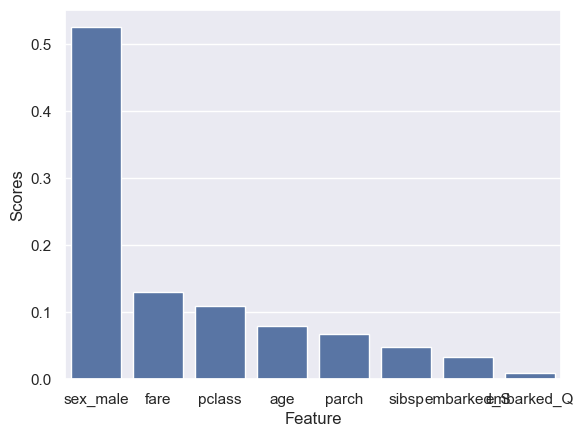


Choose [sex, fare, pclass, age] for new random forest


In [136]:
features_cleaned = [feat.replace('onehotencoder__', '').replace('remainder__','') for feat in forestC_pipe.named_steps['OneHotEncoder'].get_feature_names_out()]

df_features_scores = pd.DataFrame({
    'Feature':features_cleaned,
    'Scores':forestC_pipe.named_steps['Forest_Classifier'].feature_importances_
})

df_features_scores = df_features_scores.sort_values('Scores', ascending=False)

print(df_features_scores)
print()

sbn.barplot(data = df_features_scores, x = 'Feature', y = 'Scores')
plt.show()

print('\nChoose [sex, fare, pclass, age] for new random forest')

## <span style='color:yellow'> New forest with best features ['sex', 'fare', 'pclass', 'age']

Accuracy on train set: 0.7948016415868673
Accuracy on test  set: 0.8184713375796179


Confusion matrix:
           Dead  Survived
Dead       143        31
Survived    26       114


Classification report:
               precision    recall  f1-score   support

        Dead       0.85      0.82      0.83       174
    Survived       0.79      0.81      0.80       140

    accuracy                           0.82       314
   macro avg       0.82      0.82      0.82       314
weighted avg       0.82      0.82      0.82       314



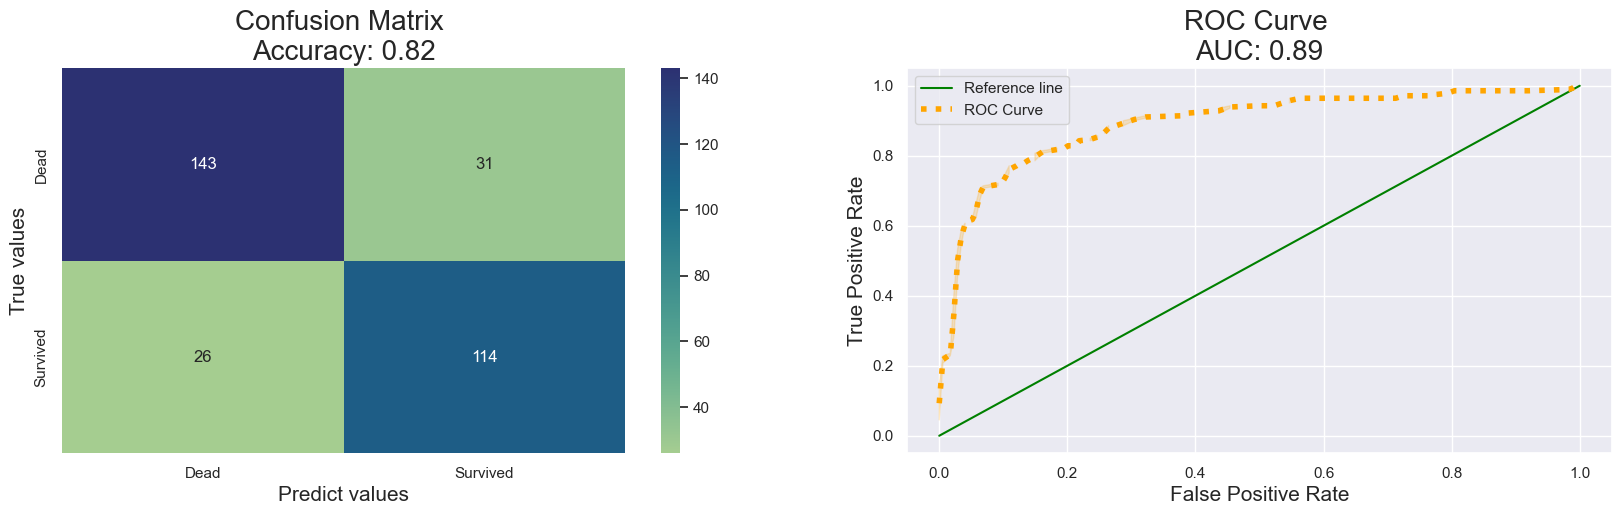


After re-training model with most important features only, the acucracy, ROC and AUC have increased


In [170]:
x = titanic[['pclass', 'sex', 'age', 'fare']].dropna()
y = titanic['survived'].iloc[x.index - 1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#########################

forestC_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer((OneHotEncoder(handle_unknown='ignore', drop='first'), x.select_dtypes('object').columns), remainder='passthrough')),
    ('SMOTE_oversample', SMOTE(random_state=1)),
    ('Forest_Classifier', RandomForestClassifier(min_samples_split = 80, random_state=1) )
])

forestC_pipe.fit(x_train, y_train)

y_test_pred = forestC_pipe.predict(x_test)
y_test_proba = forestC_pipe.predict_proba(x_test)

print(f'Accuracy on train set: {forestC_pipe.score(x_train, y_train)}')
print(f'Accuracy on test  set: {forestC_pipe.score(x_test, y_test)}')
print()

labels = ['Dead', 'Survived']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {forestC_pipe.score(x_test, y_test):.2f}', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x = [0,1], y = [0,1], label = 'Reference line', color = 'green')
sbn.lineplot(x = fpr, y = tpr, label = 'ROC Curve', linestyle = 'dotted', color = 'orange', linewidth=4)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title(f'ROC Curve \nAUC: {auc(fpr, tpr):.2f}', size=20)
plt.show()

print('\nAfter re-training model with most important features only, the acucracy, ROC and AUC have increased')

## <span style='color:yellow'> Predict new values

In [203]:
new_inputs = pd.DataFrame([[3, 'male', 35, 50 ], [2,  'female', 18, 250]], columns = x.columns)
new_inputs['survived_predict'] = forestC_pipe.predict(new_inputs)
new_inputs

,pclass,sex,age,fare,survived_predict
0,3,male,35,50,0
1,2,female,18,250,1
